## Import libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix,\
        accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,StackingClassifier,ExtraTreesClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB

from time import time
from datetime import timedelta

import seaborn as sns
from matplotlib import pyplot as plt

sns.set()


## Load dataset

In [ ]:
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/ML/Machine Learning Project. GALINDO - PAGLIA/kickafterpreprocess.csv', sep=";")

Mounted at /content/drive


In [ ]:
df.columns

Index(['IsBadBuy', 'Auction', 'VehicleAge', 'SubModel', 'Color',
       'Transmission', 'WheelType', 'VehOdo', 'Nationality', 'Size', 'VNST',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'season', 'age_cat',
       'VehOdo_cat', 'VehBCost_cat', 'WarrantyCost_cat'],
      dtype='object')

In [ ]:
df.isna().sum()

IsBadBuy            0
Auction             0
VehicleAge          0
SubModel            0
Color               0
Transmission        0
WheelType           0
VehOdo              0
Nationality         0
Size                0
VNST                0
VehBCost            0
IsOnlineSale        0
WarrantyCost        0
season              0
age_cat             0
VehOdo_cat          0
VehBCost_cat        0
WarrantyCost_cat    0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

IsBadBuy            0
Auction             0
VehicleAge          0
SubModel            0
Color               0
Transmission        0
WheelType           0
VehOdo              0
Nationality         0
Size                0
VNST                0
VehBCost            0
IsOnlineSale        0
WarrantyCost        0
season              0
age_cat             0
VehOdo_cat          0
VehBCost_cat        0
WarrantyCost_cat    0
dtype: int64

In [ ]:
# Get dummies 
Auction_dummies =pd.get_dummies(df['Auction'], prefix='Auction')
SubModel_dummies = pd.get_dummies(df['SubModel'], prefix='SubModel')
Color_dummies = pd.get_dummies(df['Color'], prefix='Color')
Transmission_dummies = pd.get_dummies(df['Transmission'], prefix='Transmission')
WheelType_dummies = pd.get_dummies(df['WheelType'], prefix='WheelType')
Nationality_dummies = pd.get_dummies(df['Nationality'], prefix='Nationality')
Size_dummies = pd.get_dummies(df['Size'], prefix='Size')
VNST_dummies = pd.get_dummies(df['VNST'], prefix='VNST')
IsOnlineSale_dummies = pd.get_dummies(df['IsOnlineSale'], prefix='IsOnlineSale')
season_dummies = pd.get_dummies(df['season'], prefix='season')
age_cat_dummies = pd.get_dummies(df['age_cat'], prefix='age_cat')
VehOdo_cat_dummies = pd.get_dummies(df['VehOdo_cat'], prefix='VehOdo_cat')
VehBCost_cat_dummies = pd.get_dummies(df['VehBCost_cat'], prefix='VehBCost_cat')
WarrantyCost_cat_dummies = pd.get_dummies(df['WarrantyCost_cat'], prefix='WarrantyCost_cat')

In [ ]:
df = pd.concat([df['IsBadBuy'],Auction_dummies, 
                SubModel_dummies, 
                Color_dummies,
                Transmission_dummies,
                WheelType_dummies, 
                Nationality_dummies, 
                Size_dummies, 
                VNST_dummies,
                IsOnlineSale_dummies,
                season_dummies,
                age_cat_dummies,
                VehOdo_cat_dummies,
                VehBCost_cat_dummies,
                WarrantyCost_cat_dummies
                ], axis='columns')
df.columns

Index(['IsBadBuy', 'Auction_ADESA', 'Auction_MANHEIM', 'Auction_OTHER',
       'SubModel_CAB', 'SubModel_COUPE', 'SubModel_CUV', 'SubModel_MINIVAN',
       'SubModel_OTHER', 'SubModel_PASSENGER', 'SubModel_SEDAN',
       'SubModel_SPORT', 'SubModel_SUV', 'SubModel_WAGON', 'Color_BEIGE',
       'Color_BLACK', 'Color_BLUE', 'Color_BROWN', 'Color_GOLD', 'Color_GREEN',
       'Color_GREY', 'Color_MAROON', 'Color_ORANGE', 'Color_OTHER',
       'Color_PURPLE', 'Color_RED', 'Color_SILVER', 'Color_WHITE',
       'Color_YELLOW', 'Transmission_AUTO', 'Transmission_MANUAL',
       'WheelType_Alloy', 'WheelType_Covers', 'WheelType_Special',
       'Nationality_AMERICAN', 'Nationality_ASIAN', 'Nationality_OTHER',
       'Size_COMPACT', 'Size_LARGE', 'Size_MEDIUM', 'Size_OTHER', 'Size_SUV',
       'Size_TRUCK', 'Size_VAN', 'VNST_CENTRAL', 'VNST_EAST', 'VNST_WEST',
       'IsOnlineSale_no', 'IsOnlineSale_yes', 'season_fall', 'season_spring',
       'season_summer', 'season_winter', 'age_cat_0to3_year

In [ ]:
df

,IsBadBuy,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,SubModel_CAB,SubModel_COUPE,SubModel_CUV,SubModel_MINIVAN,SubModel_OTHER,SubModel_PASSENGER,...,VehOdo_cat_73322-82383,VehOdo_cat_>82383,VehBCost_cat_0-5440,VehBCost_cat_5440-6710,VehBCost_cat_6710-7900,VehBCost_cat_>7900,WarrantyCost_cat_0-837,WarrantyCost_cat_1155-1623,WarrantyCost_cat_837-1155,WarrantyCost_cat_>1623
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69727,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
69728,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
69729,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
69730,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
#pd.Series(np.where(df1.IsBadBuy.values == 'yes', 1, 0),
          #df1.index)

In [ ]:
from sklearn.model_selection import train_test_split
y=df['IsBadBuy']
X=df.drop(columns='IsBadBuy')
X_learn, X_test, y_learn, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)
X_train, X_val, y_train, y_val = train_test_split(X_learn, y_learn, test_size=0.20, random_state=2022)

# Modelling

## Metrics

In [ ]:
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    pred = pd.Series(pred)
    true = pd.Series(true)
    
    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

In [ ]:
def compute_metrics(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    f1_score_1 = f1_score(y_true,y_pred,average='binary',pos_label=1)
    f1_score_0 = f1_score(y_true,y_pred,average='binary',pos_label=0)
    f1_score_macro = f1_score(y_true,y_pred,average='macro')
    return [accuracy,f1_score_1,f1_score_0,f1_score_macro]
    
    

results = pd.DataFrame(columns=['Accuracy', 'F1-score (class 1)', 'F1-score (class 0)', 'F1-score (macro avg)'])

## Decision Tree

In [ ]:
X_learn

,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,SubModel_CAB,SubModel_COUPE,SubModel_CUV,SubModel_MINIVAN,SubModel_OTHER,SubModel_PASSENGER,SubModel_SEDAN,...,VehOdo_cat_73322-82383,VehOdo_cat_>82383,VehBCost_cat_0-5440,VehBCost_cat_5440-6710,VehBCost_cat_6710-7900,VehBCost_cat_>7900,WarrantyCost_cat_0-837,WarrantyCost_cat_1155-1623,WarrantyCost_cat_837-1155,WarrantyCost_cat_>1623
20354,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
31876,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4607,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
60551,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
463,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
57176,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
46769,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
16557,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
y_learn

20354    0
31876    0
4607     0
60551    0
463      0
        ..
2066     0
57176    0
46769    0
16557    0
1244     0
Name: IsBadBuy, Length: 55785, dtype: int64

In [ ]:
#X_learn, X_test, y_learn, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)
#X_train, X_val, y_train, y_val = train_test_split(X_learn, y_learn, test_size=0.20, random_state=2022)
model_tree = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
model_tree.fit


<bound method DecisionTreeClassifier.fit of DecisionTreeClassifier()>

In [ ]:
import graphviz
import pydot
import pydotplus

dot_data = export_graphviz(model_tree, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['NotBadBuy', 'BadBuy'],  
                         filled=True, 
                         max_depth = 10,
                         rotate=True)  
#graph

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("DT.pdf")


True

In [ ]:
y_train

59881    0
28834    1
61428    0
65951    0
5911     0
        ..
29873    0
62049    1
36470    1
25063    0
30904    0
Name: IsBadBuy, Length: 44628, dtype: int64

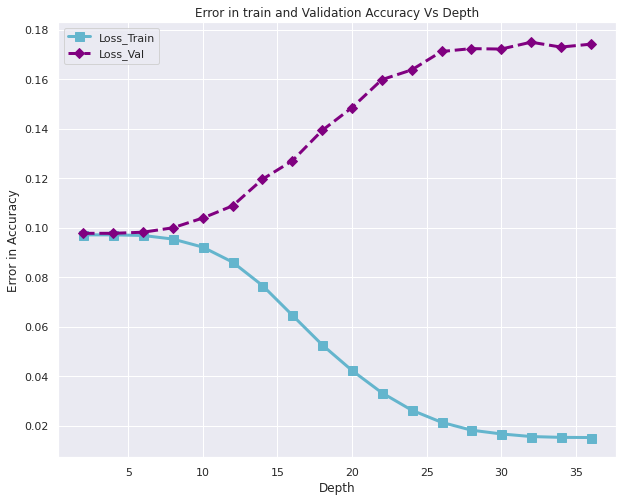

In [ ]:
def max_depth(min,max):
    depth=[]
    tr_ac=[]
    va_ac=[]
    for i in range(min,max,2):
        model =DecisionTreeClassifier(max_depth=i, random_state=42)
        model.fit(X_train,y_train)
        depth.append(i)
        tr_ac.append(model.score(X_train,y_train))
        va_ac.append(model.score(X_val,y_val))
        
    tr_ac=1-np.array(tr_ac);
    va_ac=1-np.array(va_ac);
    
    plt.figure(figsize=(10,8))
    plt.title('Error in train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Error in Accuracy')
    plt.plot(depth,tr_ac,'cs-',linewidth=3,markersize=9)
    plt.plot(depth,va_ac,'D--',color='purple',linewidth=3, markersize=7)
    plt.legend(['Loss_Train','Loss_Val']);
    plt.show()
max_depth(2,37)


In [ ]:
y_pred = model_tree.predict(X_val)

#y_pred = np.where(y_pred == 'yes', 1, 0)
#y_val = np.where(y_val == 'yes', 1, 0)

results.loc['DT-default',:] = compute_metrics(y_val, y_pred)

confusion(y_val, y_pred)

predicted,0,1
target,,
0,9051,1016
1,946,144


In [ ]:
print(classification_report(y_val,
                            y_pred,
                            target_names=['no', 'yes'],))

results

              precision    recall  f1-score   support

          no       0.91      0.90      0.90     10067
         yes       0.12      0.13      0.13      1090

    accuracy                           0.82     11157
   macro avg       0.51      0.52      0.52     11157
weighted avg       0.83      0.82      0.83     11157



,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-default,0.824146,0.128,0.902213,0.515106


In [ ]:
y_pred_train = model_tree.predict(X_train)

confusion(y_train,y_pred_train)

print(classification_report(y_train,
                            y_pred_train,
                            target_names=['no', 'yes'],))

              precision    recall  f1-score   support

          no       0.98      1.00      0.99     40296
         yes       1.00      0.85      0.92      4332

    accuracy                           0.98     44628
   macro avg       0.99      0.92      0.95     44628
weighted avg       0.99      0.98      0.98     44628



In [ ]:
print('Tree depth: {}\nNodes: {}'.format(model_tree.tree_.max_depth, model_tree.tree_.node_count))

Tree depth: 37
Nodes: 17135


In [ ]:
criterion = ['gini', 'entropy']

max_dephts = [None, 4, 6, 10, 20]
min_samples_split = [1, 2, 4, 9,  90]
min_samples_leaf = [1, 2, 4, 9,  90]
max_features = ['sqrt', 'log2', None]

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

init_time = time()
model_tree = DecisionTreeClassifier()

f1_class_0_scorer = make_scorer(f1_score, pos_label=0)
f1_class_1_scorer = make_scorer(f1_score, pos_label=1)

scoring_dict = {
    'f1_mac': 'f1_macro',
    'f1_class_0': f1_class_0_scorer,
    'f1_class_1': f1_class_1_scorer,
    'acc': 'accuracy'
}

trc = GridSearchCV(estimator=model_tree,
                   scoring=scoring_dict,
                   param_grid={
                       'criterion': criterion,
                       'max_features': max_features,
                       'max_depth': max_dephts,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf
                   },
                   cv=5,
                   return_train_score=False,
                   refit='f1_mac')

model_5CV = trc.fit(X_train, y_train)
print(timedelta(seconds=(time() - init_time)))

0:05:44.962100


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
750 fits failed out of a total of 3750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

In [ ]:
scoring_cols = [
    'param_criterion', 'param_max_depth', 'param_max_features',
    'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_f1_mac',
    'mean_test_f1_class_0', 'mean_test_f1_class_1', 'mean_test_acc'
]

pd.DataFrame(model_5CV.cv_results_).sort_values(by='mean_test_f1_mac',
                                                 ascending=False)[scoring_cols].head() #Guardar en el excel 

,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_f1_mac,mean_test_f1_class_0,mean_test_f1_class_1,mean_test_acc
401,entropy,None,log2,1,2,0.523729,0.911038,0.136420,0.838711
51,gini,None,None,1,2,0.523085,0.903607,0.142564,0.826701
376,entropy,None,sqrt,1,2,0.522925,0.908952,0.136897,0.835283
1,gini,None,sqrt,1,2,0.522818,0.909882,0.135754,0.836784
26,gini,None,log2,1,2,0.520712,0.910184,0.131239,0.837210


In [ ]:
scoring_cols = [
    'param_criterion', 'param_max_depth', 'param_max_features',
    'param_min_samples_leaf', 'param_min_samples_split', 'mean_test_f1_mac',
    'mean_test_f1_class_0', 'mean_test_f1_class_1', 'mean_test_acc'
]

pd.DataFrame(model_5CV.cv_results_).sort_values(by='mean_test_f1_mac',
                                                 ascending=False)[scoring_cols].head()
pd.DataFrame(model_5CV.cv_results_).to_excel("scoring_cols.xlsx")  

In [ ]:
best_params = model_5CV.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
y_pred = model_5CV.predict(X_val)

results.loc['DT-best',:] = compute_metrics(y_val, y_pred)

confusion(y_val,y_pred)
results.sort_values(by='F1-score (macro avg)', ascending=False)

,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.844134,0.129194,0.914407,0.5218
DT-default,0.824146,0.128,0.902213,0.515106
extra_trees-best,0.889935,0.056836,0.941557,0.499196
RF-balance,0.88626,0.053691,0.939494,0.496592
RF-default,0.893341,0.041868,0.943527,0.492697


In [ ]:
DT_model_tuned = DecisionTreeClassifier(**best_params)
DT_model_tuned.fit(X_train, y_train)

y_pred = DT_model_tuned.predict(X_val)

results.loc['DT-best', :] = compute_metrics(y_val, y_pred)

results.sort_values(by='F1-score (macro avg)', ascending=False)

,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.842789,0.136811,0.913519,0.525165
DT-default,0.824146,0.128,0.902213,0.515106
extra_trees-best,0.889935,0.056836,0.941557,0.499196
RF-balance,0.88626,0.053691,0.939494,0.496592
RF-default,0.893341,0.041868,0.943527,0.492697


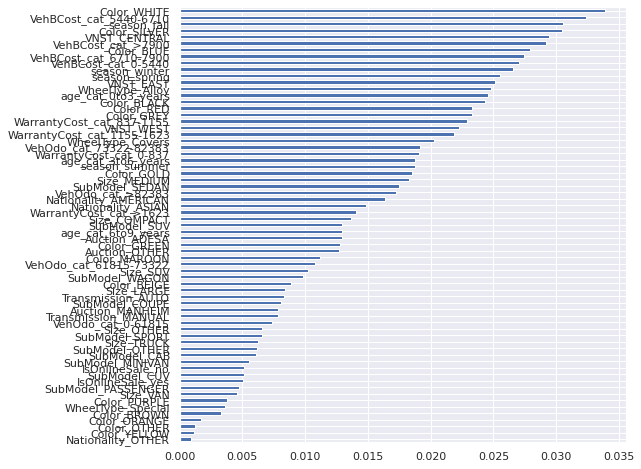

In [ ]:

var_imp = pd.DataFrame({'importance': DT_model_tuned.feature_importances_},
                       index=X_train.columns)

var_imp.sort_values(by='importance').plot.barh(figsize=(8,8),
                                               legend=False);


## Random Forest

We also introduce the **Out-of-Bag** (OOB) error. This error is a metric that we can compute on Random Forest model while training. It is very very useful because it allows us to perform model selection (tune hyperparameters) without having to execute costly cross-validations.

While training, RF separates the data into subsets with replacement and trains the different trees of the forest with them. The OOB score is obtained by computing the accuracy of the trees on a set of samples that are not being used to train each specific tree. So, it acts as a **validation** score rather than a training one.


In [ ]:
model_rf1 = RandomForestClassifier(oob_score=True).fit(X_train, y_train)

pred = model_rf1.predict(X_train)

confusion(y_train,pred)

print(classification_report(y_train,
                            pred,
                            target_names=['NotBadBuy', 'BadBuy'],))

print('OOB accuracy=', model_rf1.oob_score_)

              precision    recall  f1-score   support

   NotBadBuy       0.99      1.00      0.99     40296
      BadBuy       0.98      0.86      0.92      4332

    accuracy                           0.98     44628
   macro avg       0.98      0.93      0.95     44628
weighted avg       0.98      0.98      0.98     44628

OOB accuracy= 0.891032535627857


In [ ]:
y_pred = model_rf1.predict(X_val)
print('Validation Accuracy:{}'.format(model_rf1.score(X_val,y_val)))
results.loc['RF-default',:] = compute_metrics(y_val,y_pred)
confusion(y_val,y_pred)

Validation Accuracy:0.8935197633772519


predicted,0,1
target,,
0,9939,128
1,1060,30


In [ ]:
results.sort_values(by='F1-score (macro avg)', ascending=False)

,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.842789,0.136811,0.913519,0.525165
DT-default,0.824146,0.128,0.902213,0.515106
extra_trees-best,0.889935,0.056836,0.941557,0.499196
RF-balance,0.88626,0.053691,0.939494,0.496592
RF-default,0.89352,0.048077,0.943606,0.495841


In [ ]:
model_rf2 = RandomForestClassifier(n_estimators=100, 
                                   oob_score=True, 
                                   class_weight='balanced').fit(X_train, y_train)

pred = model_rf2.predict(X_train)

confusion(y_train, pred)

print(classification_report(y_train,pred,target_names=['no', 'yes'],))

print('OOB accuracy=', model_rf2.oob_score_)

              precision    recall  f1-score   support

          no       1.00      0.98      0.99     40296
         yes       0.84      0.99      0.91      4332

    accuracy                           0.98     44628
   macro avg       0.92      0.98      0.95     44628
weighted avg       0.98      0.98      0.98     44628

OOB accuracy= 0.8844447432105405


In [ ]:
y_pred = model_rf2.predict(X_val)

results.loc['RF-balance',:] = compute_metrics(y_val,y_pred)

confusion(y_val,y_pred)

predicted,0,1
target,,
0,9859,208
1,1057,33


In [ ]:
results.sort_values(by='F1-score (macro avg)', ascending=False)

,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.842789,0.136811,0.913519,0.525165
DT-default,0.824146,0.128,0.902213,0.515106
extra_trees-best,0.889935,0.056836,0.941557,0.499196
RF-default,0.89352,0.048077,0.943606,0.495841
RF-balance,0.886618,0.049587,0.939713,0.49465


In [ ]:
init_time = time()

rf_model = RandomForestClassifier()


ntrees = [100,200,500]
max_depth = [None, 4, 6, 10, 20]
min_samples_split = [1, 2, 4, 9]
min_samples_leaf = [1, 2, 4, 9]
balance = [None, 'balanced', 'balanced_subsample']

trc = GridSearchCV(estimator=rf_model,
                   scoring=scoring_dict,
                   param_grid={
                       'n_estimators': ntrees,
                       'max_depth':max_depth,
                       'min_samples_split':min_samples_split,
                       'min_samples_leaf':min_samples_leaf, 
                       'class_weight':balance
                   },
                   cv=5,
                   return_train_score=False,
                   refit=False,
                   n_jobs=-1)

model_5CV = trc.fit(X_train, y_train)
print(timedelta(seconds=(time() - init_time)))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


5:07:42.994136


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
900 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

In [ ]:
scoring_cols = [
    'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
    'mean_test_f1_mac', 'mean_test_f1_class_0', 'mean_test_f1_class_1',
    'mean_test_acc'
]
pd.DataFrame(model_5CV.cv_results_).sort_values(
    by='mean_test_f1_mac', ascending=False)[scoring_cols].head()

,param_max_depth,param_min_samples_leaf,param_min_samples_split,mean_test_f1_mac,mean_test_f1_class_0,mean_test_f1_class_1,mean_test_acc
705,20,4,9,0.557143,0.903465,0.210822,0.828000
271,None,4,4,0.556272,0.913424,0.199120,0.843753
463,20,4,4,0.555625,0.904332,0.206918,0.829277
275,None,4,9,0.555517,0.912995,0.198039,0.843036
267,None,4,2,0.555483,0.912567,0.198398,0.842341


In [ ]:
best_params = pd.DataFrame(model_5CV.cv_results_).sort_values(by='mean_test_f1_mac',ascending=False)[['params']].iloc[0,0]
best_params

{'class_weight': 'balanced_subsample',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'n_estimators': 100}

In [ ]:
#rf_model_tuned = RandomForestClassifier(**best_params)
rf_model_tuned = RandomForestClassifier(class_weight= 'balanced_subsample',
 max_depth = 20,
 min_samples_leaf = 4,
 min_samples_split = 9,
 n_estimators= 100)
rf_model_tuned.fit(X_train, y_train)

y_pred = rf_model_tuned.predict(X_val)

results.loc['RF-best', :] = compute_metrics(y_val, y_pred)

results.sort_values(by='F1-score (macro avg)', ascending=False)

,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
RF-best,0.81357,0.196291,0.894555,0.545423


In [ ]:
confusion(y_val, y_pred)

predicted,0,1
target,,
0,8823,1244
1,836,254
